In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')

In [25]:
mlp_baseline_results = pd.read_csv('mlp_baseline_results.csv')
mlp_baseline_results.replace({'simple_mlp_initializer': 'MLP'}, inplace=True)

mlp_pearson_results = pd.read_csv('mlp_pearson_results.csv')
mlp_pearson_results.replace({'mlp_preg_initializer': 'PReg-MLP'}, inplace=True)

mlp_spearman_results = pd.read_csv('mlp_spearman_results.csv')
mlp_spearman_results.replace({'mlp_sreg_initializer': 'SReg-MLP'}, inplace=True)

mlp_results = pd.concat([mlp_baseline_results, mlp_pearson_results, mlp_spearman_results])

ftl_baseline_results = pd.read_csv('ftl_baseline_results.csv')
ftl_baseline_results.replace({'ftl_mlp_initializer': 'FTL'}, inplace=True)

ftl_pearson_results = pd.read_csv('ftl_pearson_results.csv')
ftl_pearson_results.replace({'ftl_mlp_initializer': 'PReg-FTL'}, inplace=True)

ftl_spearman_results = pd.read_csv('ftl_spearman_results.csv')
ftl_spearman_results.replace({'ftl_mlp_initializer': 'SReg-FTL'}, inplace=True)

ftl_results = pd.concat([ftl_baseline_results, ftl_pearson_results, ftl_spearman_results])

In [26]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [27]:
for results in [mlp_results,ftl_results]:
    results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Marketing'}, inplace=True)
    results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [28]:
display(results)

,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,solution
0,Adult Income,FTL,mcc_parity,0.494246,0.834936,0.559881,0.105715,0.065635,0.192739,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
1,Adult Income,FTL,mcc_odds,0.526651,0.844002,0.575709,0.049059,0.170094,0.018271,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
2,Adult Income,FTL,mcc_opportunity,0.528761,0.823328,0.590304,0.099124,0.259137,0.061543,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
3,Adult Income,FTL,acc_parity,0.728663,0.836263,0.530541,0.024246,0.107601,0.027139,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
4,Adult Income,FTL,acc_odds,0.824289,0.839469,0.526192,0.015181,0.104461,0.002116,"{'corr_type': 'pearson', 'l2': 0.0, 'dropout':..."
...,...,...,...,...,...,...,...,...,...,...
67,Adult Income,SReg-FTL,mcc_odds,0.539093,0.843449,0.580012,0.040919,0.166083,0.012468,"{'corr_type': 'spearman', 'l2': 0.001, 'dropou..."
68,Adult Income,SReg-FTL,mcc_opportunity,0.585072,0.842233,0.589531,0.046258,0.188986,0.004459,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."
69,Adult Income,SReg-FTL,acc_parity,0.791413,0.815810,0.436570,0.218489,0.024396,0.389870,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."
70,Adult Income,SReg-FTL,acc_odds,0.792800,0.844223,0.557665,0.051423,0.122700,0.063949,"{'corr_type': 'spearman', 'l2': 0.0001, 'dropo..."


In [29]:
datasets = results['dataset'].unique().tolist()
datasets

['Adult Income']

In [30]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [31]:
fitness_rules_target_metrics = {
    'mcc_parity': {'performance': 'Mathew Correlation', 'fairness': 'Statistical Parity'},
    'mcc_opportunity': {'performance': 'Mathew Correlation', 'fairness': 'Equal Opportunity'},
    'mcc_odds': {'performance': 'Mathew Correlation', 'fairness': 'Equalized Odds'},
    'acc_parity': {'performance': 'Accuracy', 'fairness': 'Statistical Parity'},
    'acc_opportunity': {'performance': 'Accuracy', 'fairness': 'Equal Opportunity'},
    'acc_odds': {'performance': 'Accuracy', 'fairness': 'Equalized Odds'}
}

fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds': 'Max(Acc - Eq. Opp.)'
}

for results in [mlp_results,ftl_results]:
    results['Performance'] = 0
    results['Fairness'] = 0
    results['Fitness Rule'] = ''
    for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
        results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
        results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
        results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
        results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

/tmp/ipykernel_1389163/3607436483.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.58517004 0.58512823 0.5840247  0.5836371  0.57625737 0.5769683
 0.58075151 0.57811729 0.57147862 0.55847176 0.56402881 0.56841327
 0.56481476 0.58141906 0.57136131 0.58334192 0.55288815 0.56058845
 0.5737951  0.57000708 0.57640052 0.58261133 0.57454722 0.57134873
 0.59039745 0.58475101 0.58230021 0.57479453 0.5876658  0.59199945
 0.59145802 0.5797924  0.59391819]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
/tmp/ipykernel_1389163/3607436483.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.19263281 0.18664775 0.20096652 0.19289642 0.19661682 0.17761564
 0.19442911 0.1975522

In [32]:
ftl_methods = ['FTL', 'PReg-FTL', 'SReg-FTL']
mlp_methods = ['MLP', 'PReg-MLP', 'SReg-MLP']

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


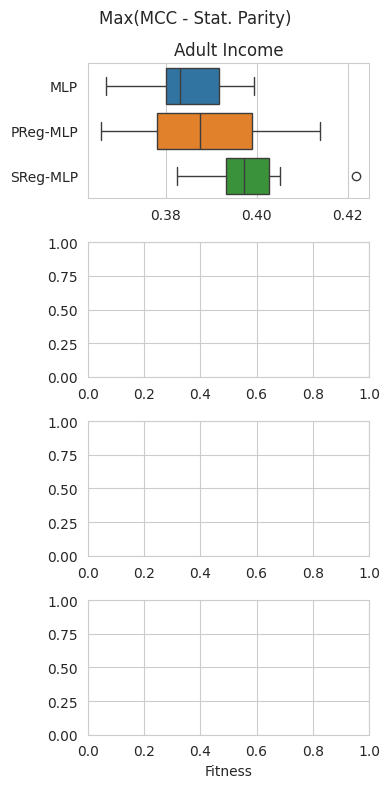

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


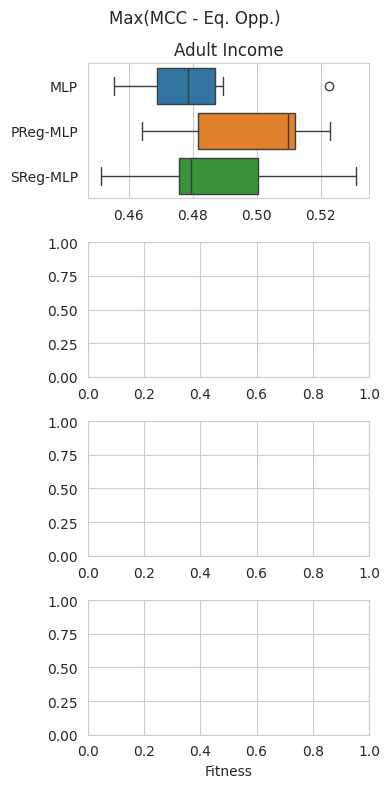

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


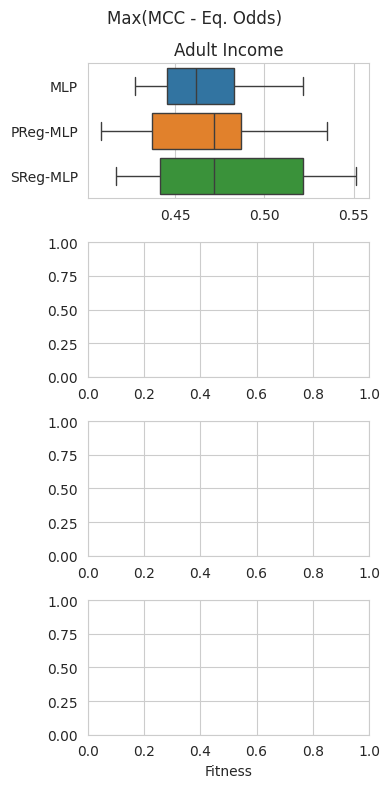

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


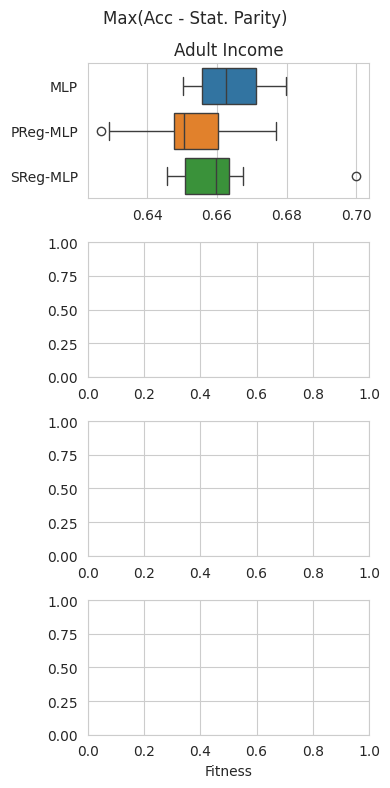

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


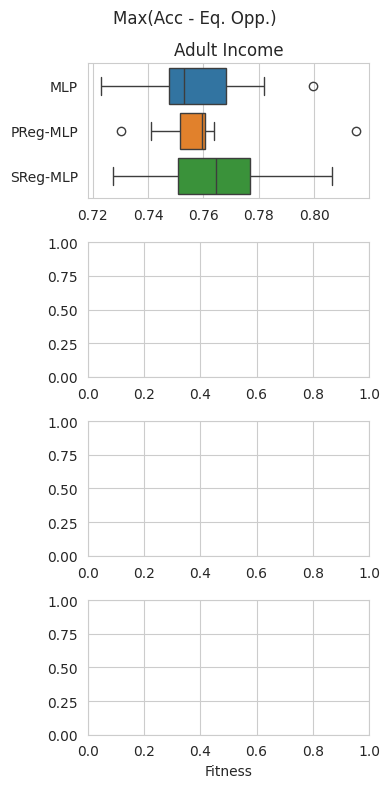

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


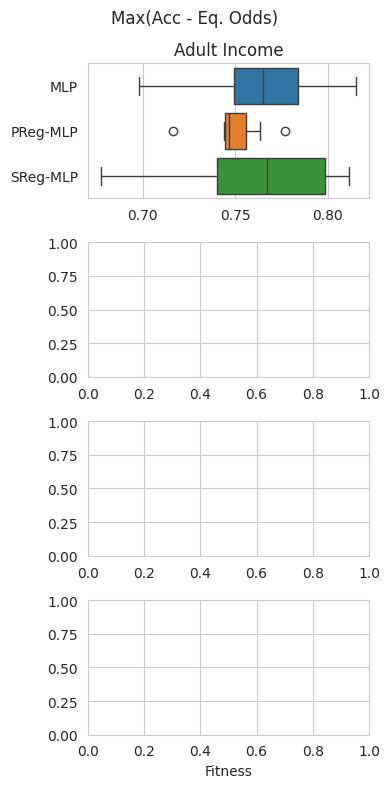

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


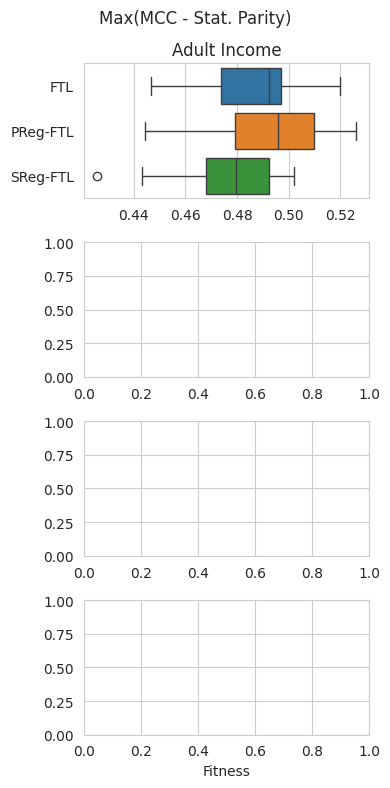

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


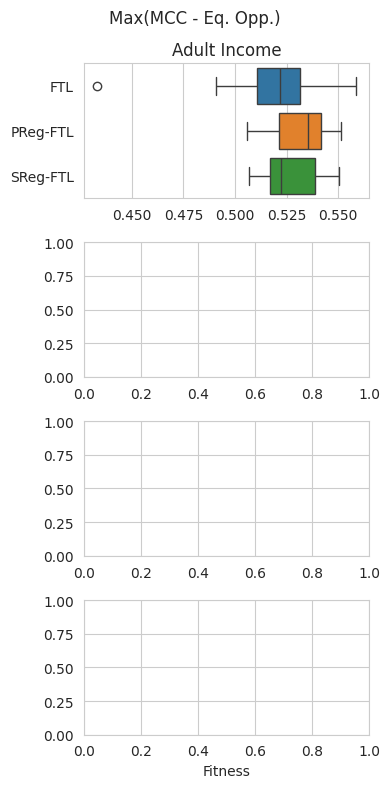

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


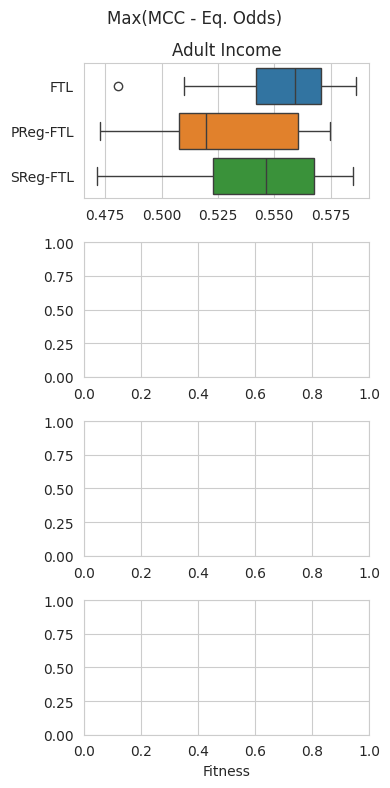

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


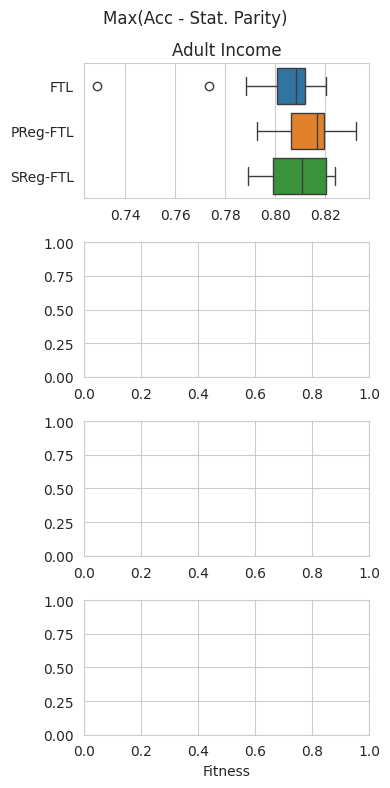

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


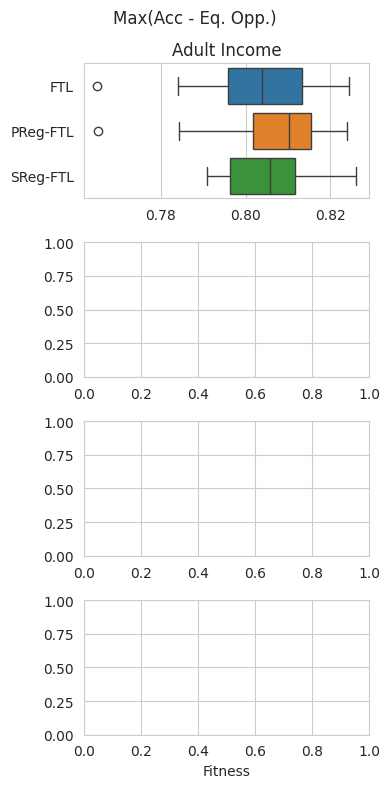

/tmp/ipykernel_1389163/714142344.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]


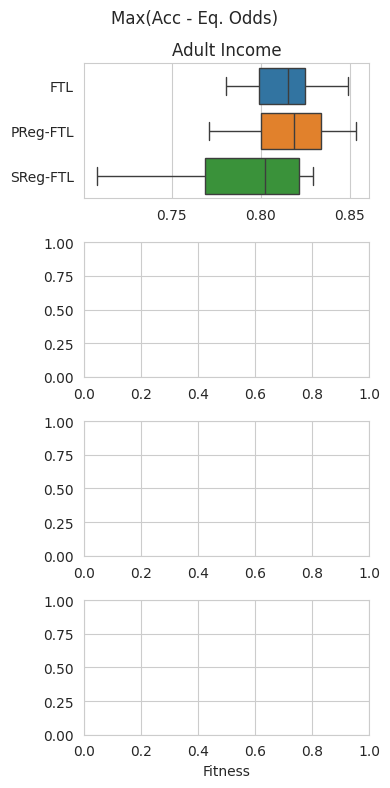

In [33]:
for results, methods in zip([mlp_results, ftl_results],[mlp_methods,ftl_methods]):
    for fitness_rule in fitness_rules:
        fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 8))
        fig.subplots_adjust(hspace=0.7)
        fig.suptitle(fitness_rules_abvr[fitness_rule])
    
        for dataset, ax in zip(sorted(datasets), axes.flatten()):
            by_fitness_rule = results[results.fitness_rule == fitness_rule][results.dataset == dataset]
            by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
            by_fitness_rule = by_fitness_rule.sort_values(by='method')
    
            boxplot = sns.boxplot(data=by_fitness_rule, hue='method',
                        x='fitness', y='method', ax=ax)
    
            #ax.set_ylabel(dataset)
            #ax.yaxis.set_label_position("right")
            ax.set_title(dataset)
            ax.set_ylabel('')
            ax.set_xlabel('')
    
            # Remove y-ticks from the second column
            if ax.get_subplotspec().colspan.start != 0:
                ax.set_yticks([])
    
    
            # Remove x-ticks and labels from all but the last row
            if ax.get_subplotspec().rowspan.start != 3:
                ax.set_xlabel('')
    
    
        # Set x-labels for the last row
        axes[-1].set_xlabel('Fitness')
    
        plt.tight_layout()
        plt.savefig('plots/boxplot_%s.pdf' % fitness_rule)
        plt.show()